# **PROJECT PCA DỮ LIỆU**

IMPORT DỮ LIỆU ĐẦU VÀO VÀ CHUYỂN DỮ LIỆU THÀNH DATASET

In [ ]:
#Import các thư viện
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
# Load file pickle
with open('df_merged.pkl', 'rb') as f:
    data = pickle.load(f)
data
# Gộp các DataFrame thành một DataFrame duy nhất
df = pd.concat(data)
# Xuất DataFrame ra file csv
df.to_csv('df_merged.csv')
# Hình dung dữ liệu đầu vào
df.head(10)

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,10.0,0.000000,1700.0,310.0,110.0,18345.000000,230.0
2023-04-19 02:15:50+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,20.0,0.0,2070.000000,0.0,0.0,115.0,18310.000000,0.0
2023-04-19 02:16:00+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,800.0,80.0,30.0,3070.000000,1650.0,10.0,120.0,18335.000000,0.0
2023-04-19 02:16:10+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,0.0,4070.000000,1650.0,0.0,120.0,18360.000000,150.0
2023-04-19 02:16:20+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,10.0,90.0,30.0,0.000000,0.0,0.0,120.0,18360.000000,0.0
2023-04-19 02:16:30+00:00,24.75,78.7,44.6,47.033333,29.05,79.5,97.0,15.5,19.25,21.0,...,120.0,0.0,0.0,30.0,7070.000000,1650.0,0.0,120.0,18360.000000,170.0
2023-04-19 02:16:40+00:00,24.75,78.7,44.6,47.033333,29.05,79.5,97.0,15.6,19.25,21.0,...,120.0,0.0,0.0,10.0,7086.666667,0.0,0.0,0.0,18373.333333,170.0
2023-04-19 02:16:50+00:00,24.75,78.7,44.6,47.050000,29.05,79.5,97.0,15.6,19.25,21.0,...,140.0,0.0,0.0,0.0,0.000000,1650.0,0.0,530.0,18380.000000,0.0


In [ ]:
# Thông tin dữ liệu thô
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30538 entries, 2023-04-19 02:15:30+00:00 to 2023-03-20 07:31:00+00:00
Columns: 181 entries, mua_gia_1ACB to ban_kl_2VRE
dtypes: float64(181)
memory usage: 42.4 MB


## **THÔNG TIN CHUNG VỀ DỮ LIỆU THÔ ĐẦU VÀO**
Dữ liệu chứa 30538 chỉ số và 181 cột của cổ phiếu của 30 công ty theo VN30index, trong đó bao gồm:
- 1 Cột thời gian diễn tả chuỗi thời xảy ra biến động của 30 cổ phiếu
- 181 cột chứa số liệu về cổ phiếu bao gồm: 30 số liệu giá mua, 30 số liệu chứa giá bán, 30 số liệu chứa số liệu khối lượng mua/bán bám sát 1, 30 số liệu chứa số liệu khối lượng mua/bán bám sát 2 và giá phái sinh tại từng thời điểm của 30 loại cổ phiếu.

In [ ]:
# Thông số khái quát dữ liệu chung
df.describe()

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
count,30538.000000,30538.000000,30538.000000,30538.000000,30538.00000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,...,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000,30538.000000
mean,24.718578,80.521979,45.416220,48.503214,29.04701,79.324035,101.225896,15.347294,18.844488,20.744528,...,5681.556022,3975.619488,376.033798,1216.915403,5395.777334,1213.500569,36.954521,1047.155245,19491.853970,1333.547956
std,0.546369,1.059474,0.767461,0.579654,0.44602,1.184276,2.128378,0.656697,0.781864,0.472184,...,8414.478676,9369.171671,1062.470406,3499.906192,7149.538836,2934.664004,97.986986,1503.491595,26039.193259,3032.770387
min,6.275000,78.600000,22.775000,46.200000,21.15000,39.450000,51.550000,7.200000,8.875000,3.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.500000,79.500000,44.700000,48.400000,28.75000,78.800000,99.900000,14.800000,18.050000,20.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1518.125000,0.000000
50%,24.850000,80.800000,45.600000,48.550000,29.05000,79.400000,102.100000,15.400000,19.150000,20.750000,...,2140.000000,1007.500000,0.000000,50.000000,1990.000000,0.000000,0.000000,0.000000,13090.000000,0.000000
75%,25.000000,81.500000,45.900000,48.850000,29.40000,80.100000,102.700000,15.850000,19.500000,20.950000,...,7930.000000,5020.000000,370.000000,1190.000000,9550.000000,1324.583333,0.000000,1740.000000,27556.875000,1840.000000
max,25.400000,82.900000,46.900000,51.800000,30.05000,81.400000,104.000000,16.750000,20.050000,21.850000,...,54933.333333,211830.000000,18460.000000,41440.000000,81730.000000,22490.000000,1020.000000,7920.000000,345792.500000,59875.714286


## **ĐÁNH GIÁ SƠ LƯỢC VỀ CÁC THÔNG SỐ CỦA DỮ LIỆU THÔ**
- Về giá mua: nhìn chung không chệnh lệch giữa các thời điểm.
- Về giá bán: cũng có thay đổi, nhưng không đáng kể.
- Về khối lượng mua: xu hướng đầu tư có sự phân hóa, khác nhau giữa các loại cổ phiếu.
- Về khối lượng bán: xu hướng đầu tư có sự phân hóa, khác nhau giữa các loại cổ phiếu.

## CÁC BƯỚC TIẾP CẬN CHUNG CỦA DỮ LIỆU
**Bước 1:** Tải dữ liệu vào Pandas DataFrame. Ở đây dữ liệu chứng khoán nên được lưu trữ dưới định dạng dữ liệu bảng với các hàng biểu diễn các thời điểm giao dịch, các cột biểu diễn các thông tin như giá mua, giá bán, khối lượng mua 1, khối lượng mua 2, giá phái sinh \
**Bước 2:** Chuẩn bị dữ liệu bao gồm phân tách dữ liệu.... Sau đó gộp nhóm dữ liệu\
**Bước 3:** Thực hiện chuẩn hóa dữ liệu  \
**Bước 4:** Thực hiện tính toán ma trận hiệp phương sai, vector giá trị riêng, phương sai từ giá trị riêng\
**Bước 5:**Tiến hành PCA lựa chọn thành phần chính\
**Bước 6:**


Bước 1: Phân tách dữ liệu thành các bảng riêng biệt: dữ liệu theo giá mua, giá bán, giá phái sinh, khối lượng mua, bán bám sát 1, 2

In [ ]:
# Tách dữ liệu thành các bảng riêng
# Lấy dữ liệu mua
dfmua = df.iloc[:,0:30]
# Lấy dữ liệu bán
dfban = df.iloc[:,30:60]
# Lấy dữ liệu giá phái sinh KL
dfKL=df['Gia KL']
# Lấy dữ liệu khối lượng mua bám sát 1
dfmuaKL1 = df.iloc[:,61:91]
# Lấy dữ liệu khối lượng bán bám sát 1
dfbanKL1 = df.iloc[:,91:121]
# Lấy dữ liệu khối lượng mua bám sát 2
dfmuaKL2 = df.iloc[:,121:151]
# Lấy dữ liệu khối lượng bán bám sát 2
dfbanKL2 = df.iloc[:,151:181]

Bước 2: Gộp nhóm dữ liệu


*   Dữ liệu chỉ chứa số liệu mua và giá phái sinh
*   Dữ liệu chứa dữ liệu khối lượng mua bám sát 1, 2
*   Dữ liệu chứa dữ liệu khối lượng mua bám sát 1, 2 và giá phái sinh
*   Dữ liệu chỉ chứa số liệu bán và giá phái sinh
*   Dữ liệu chứa dữ liệu khối lượng bán bám sát 1, 2 và giá phái sinh


In [ ]:
# Gộp dữ liệu thành các dataframe chứa dữ liệu mua và bán
# Dữ liệu chỉ chứa số liệu mua và giá phái sinh
dfMUA=pd.concat([dfmua,dfKL], axis="columns")
# Dữ liệu chứa dữ liệu khối lượng mua bám sát 1, 2 và giá phái sinh
dfMUAkl=pd.concat([dfmuaKL1,dfmuaKL2,dfKL], axis="columns")
# Dữ liệu chỉ chứa số liệu bán và giá phái sinh
dfBAN=pd.concat([dfban,dfKL], axis="columns")
# Dữ liệu chứa dữ liệu khối lượng bán bám sát 1, 2 và giá phái sinh
dfBANkl=pd.concat([dfbanKL1,dfbanKL2,dfKL], axis="columns")


Trực quan hóa dữ liệu

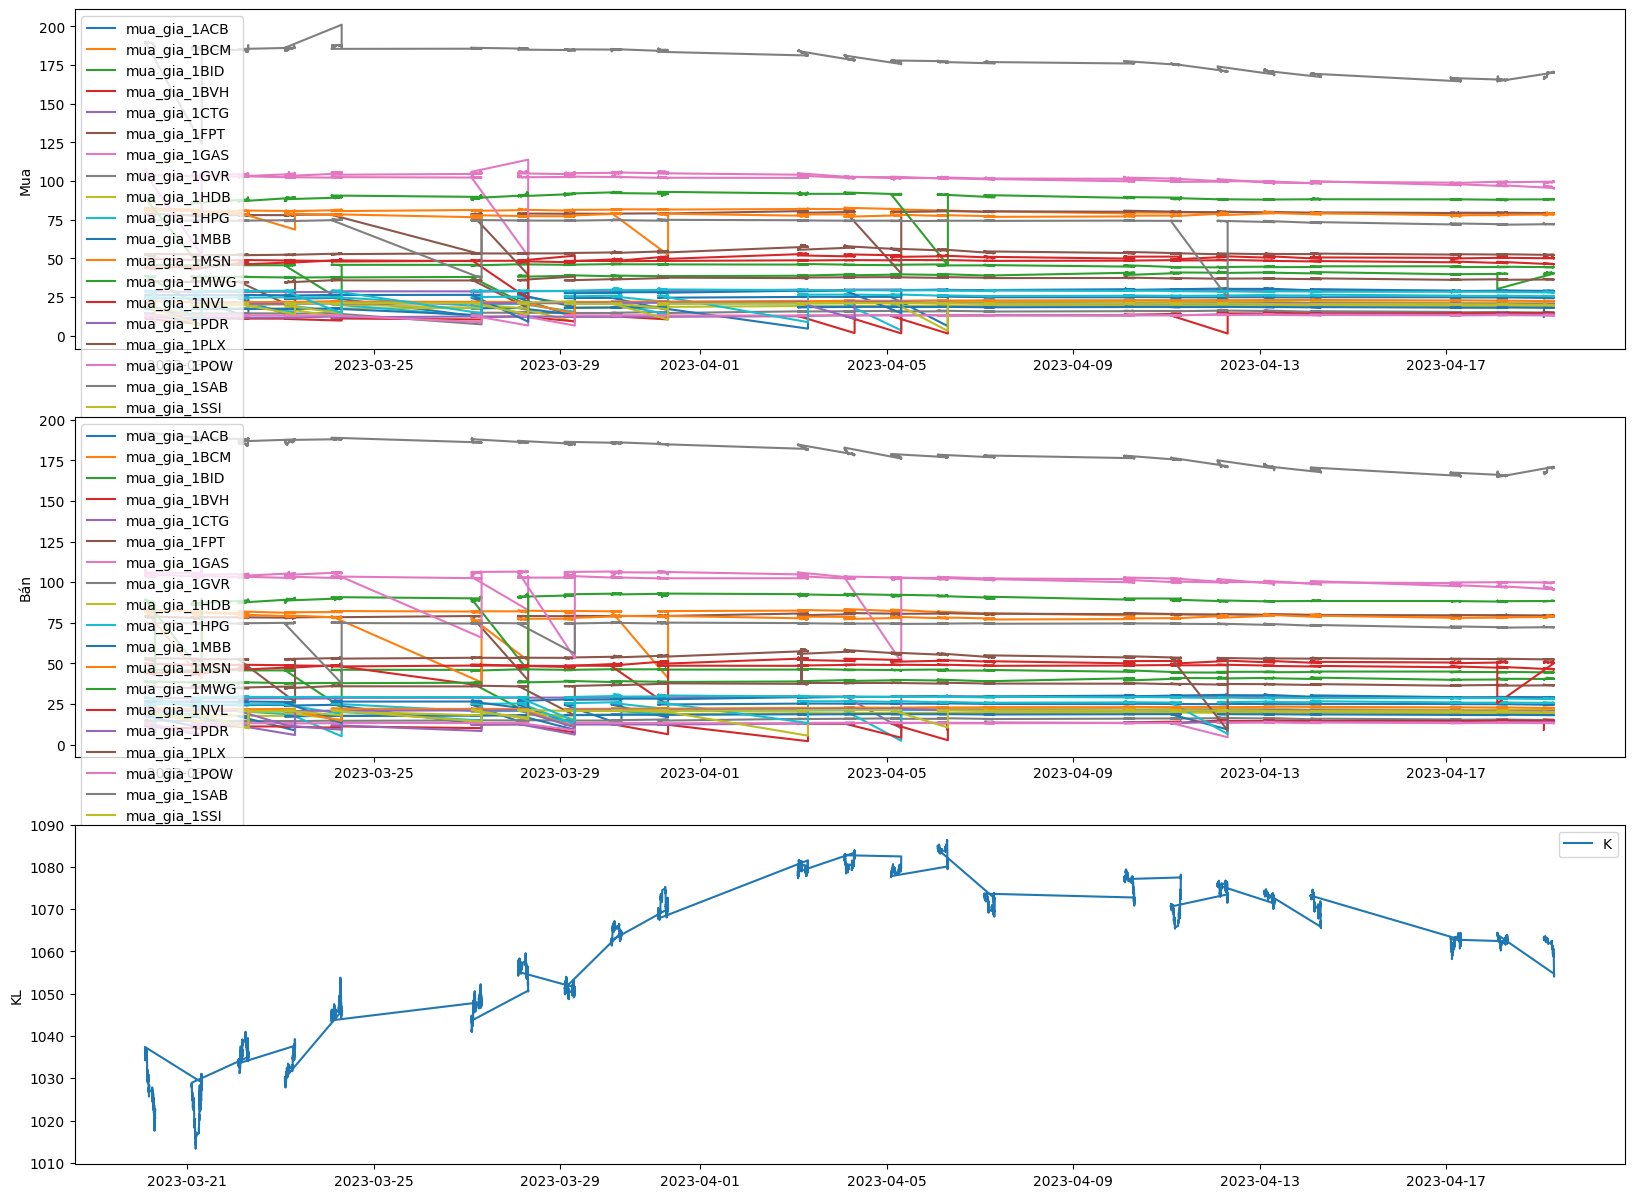

In [ ]:
# Lấy danh sách tên chứng khoán
stock_names = df.iloc[:, 0:30].columns.tolist()

# Vẽ biểu đồ đường
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# Vẽ dữ liệu Mua và Khối lượng Mua
ax[0].plot(dfmua)
ax[0].set_ylabel('Mua')
ax[0].legend(stock_names)

# Vẽ dữ liệu Bán và Khối lượng Bán
ax[1].plot(dfban)
ax[1].set_ylabel('Bán')
ax[1].legend(stock_names)

# Vẽ dữ liệu KL
ax[2].plot(dfKL)
ax[2].set_ylabel('KL')
ax[2].legend('KL')

plt.show()
# plot giá phái sinh. Biểu đồ này sẽ cho thấy xu hướng tăng hoặc giảm của giá phái sinh,
# giúp nhà đầu tư đưa ra quyết định và phân tích về xu hướng thị trường.

**Nhận xét chung về sự tăng giảm giá bán, giá mua, giá phái sinh**:
Dựa vào biểu đồ trên, ta có thể nhận thấy rằng giá bán và giá mua của các chứng khoán có xu hướng dao động theo từng giai đoạn thời gian, không có một xu hướng chung rõ ràng. Trong khi đó, giá phái sinh KL có xu hướng tăng dần vào khoảng giữa tháng 3/2023, rồi giảm dần vào giữa tháng 4/2023

<Axes: ylabel='_time'>

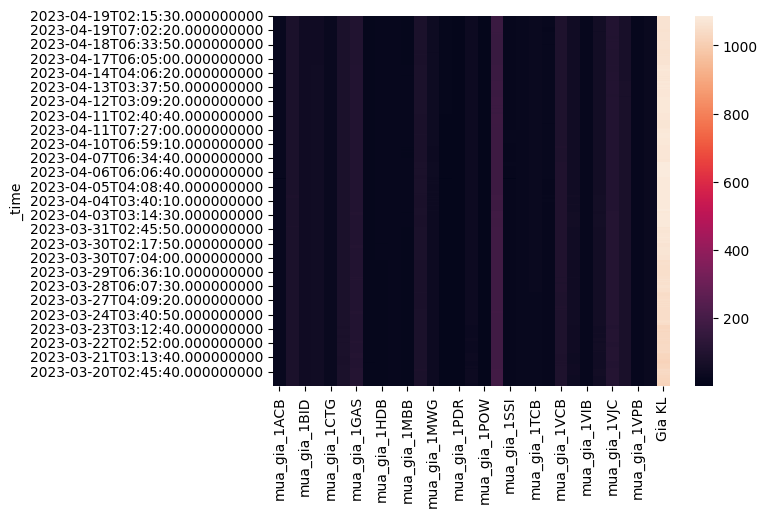

In [ ]:
sns.heatmap(dfMUA)

<Axes: ylabel='_time'>

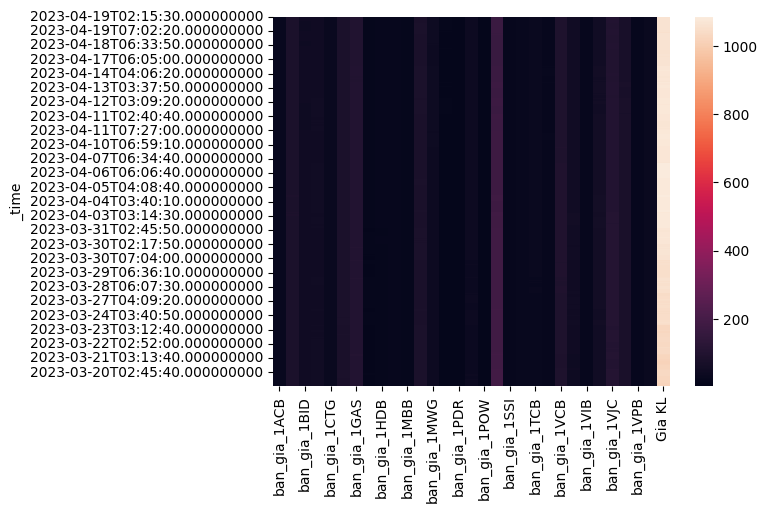

In [ ]:
sns.heatmap(dfBAN)

CÁCH SỬ DỤNG SCIKIT_LEARN TRIỂN KHAI PCA

TRIỂN KHAI PCA ĐỐI VỚI DỮ LIỆU MUA THỊ TRƯỜNG SO VỚI GIÁ PHÁI SINH TẠI THỜI ĐIỂM ĐÓ


Bước 3: Chuẩn hóa dữ liệu

In [ ]:
X=dfMUA.iloc[:,0:30]
Y=dfMUA.iloc[:,30] #target
# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
# Thực hiện transform scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
X_train

array([[0.96601307, 0.02325581, 0.90466321, ..., 0.95269382, 0.87052632,
        0.87869362],
       [0.96601307, 0.02325581, 0.90466321, ..., 0.95269382, 0.87052632,
        0.87869362],
       [0.96601307, 0.02325581, 0.90466321, ..., 0.95269382, 0.87052632,
        0.87869362],
       ...,
       [0.92679739, 0.51162791, 0.93989637, ..., 0.98028909, 0.81684211,
        0.87402799],
       [0.92679739, 0.51162791, 0.93989637, ..., 0.98028909, 0.81684211,
        0.87402799],
       [0.92679739, 0.51162791, 0.93989637, ..., 0.98028909, 0.81684211,
        0.87402799]])

**Công thức tính ma trận hiệp phương sai:**
$$
\mathbf{S} = \frac{1}{n-1}(\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})^T
$$
Trong đó:
- X là ma trận dữ liệu có n quan sát và p biến.
- μ là vector trung bình của các biến trong X.
- S là ma trận hiệp phương sai của X.

In [ ]:
#Tính toán ma trận hiệp phương sai
cov_matrix=np.cov(X_train.T)
cov_matrix

array([[ 8.16148991e-04, -2.23640088e-04, -5.31178067e-05,
        -1.05758874e-04,  8.47391837e-04,  5.59653787e-04,
        -9.42938534e-05,  1.19056386e-03,  1.24317336e-03,
         4.14872752e-04,  6.41795654e-04, -1.81187482e-04,
         6.37778229e-04,  1.18075031e-03,  3.64741403e-03,
         8.73936911e-04,  5.29140450e-04, -9.45359320e-04,
         8.97480882e-04,  6.93272837e-04,  1.19173382e-03,
         8.74014897e-04,  3.14882849e-04,  1.47673299e-03,
         3.06334643e-04,  2.65341584e-03, -2.79585498e-04,
         6.25125483e-05,  3.84768646e-04,  2.01202990e-04],
       [-2.23640088e-04,  6.07076420e-02,  6.32167873e-03,
         1.48345842e-02, -6.84156289e-04, -1.02940950e-03,
         8.18086618e-03, -5.18528684e-03, -6.09658147e-03,
         2.09719471e-04, -9.82232974e-04, -1.34707619e-03,
        -7.63868280e-03, -1.42358464e-02, -3.88907003e-02,
         2.68443245e-04, -1.81711071e-03,  1.86012335e-02,
        -2.18287555e-03, -1.83987022e-04, -7.32463228e-

**Công thức giá trị riêng (eigenvalues) và vector riêng (eigenvectors) của ma trận hiệp phương sai là:**
$$
C\vec{v} = \lambda \vec{v}
$$
Trong đó:
- C là ma trận hiệp phương sai của tập dữ liệu.
- $\vec{v}$ là vector riêng của ma trận C.
- λ là giá trị riêng (eigenvalue) tương ứng với vector riêng $\vec{v}$.

**Để tìm giá trị riêng và vector riêng của ma trận C, ta giải hệ phương trình tương ứng:**
$$(C - \lambda I)\vec{v} = \vec{0}$$
Trong đó:

I là ma trận đơn vị cùng kích thước với C.
Phương trình này có nghiệm khác không khi và chỉ khi định thức của ma trận
$(C−λI)$ bằng 0. Khi đó, các giá trị λ tìm được là giá trị riêng của ma trận C, và các vector nằm trong không gian con sinh bởi ma trận $(C−λI)$ là các vector riêng của C.

In [ ]:
# Tính toán vector giá trị riêng
eigen_value,eigen_vector=np.linalg.eig(cov_matrix)
# Sắp xếp các giá trị rieng theo thu tu giam dan
sorted_id=np.argsort(eigen_value)[::-1]
sorted_eivl=eigen_value[sorted_id]
sorted_eivt=eigen_vector[:,sorted_id]
# Tính toán phương sai từ giá trị riêng
tot = sum(eigen_value)
var_exp = [(i/tot)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 56.87264042,  88.93142431,  92.60109184,  94.64027832,
        95.86752862,  96.54487342,  97.06206489,  97.50384819,
        97.84598713,  98.18056509,  98.45514721,  98.67680457,
        98.87656351,  99.07263922,  99.23150999,  99.35639234,
        99.46725287,  99.56633021,  99.64806462,  99.71918851,
        99.77679115,  99.82738868,  99.86436544,  99.89788269,
        99.92623772,  99.94514646,  99.96237608,  99.97758338,
        99.99077604, 100.        ])

Dùng PCA để giảm số chiều dữ liệu thành 10

In [ ]:
# Giảm chiều dữ liệu thành 10
my_pca=PCA(n_components=10)
my_pca.fit(X_train)
pca_scale_df=my_pca.transform(X_train)
pca_scale_df.shape

print('Shape before PCA: ', X_train.shape)
print('Shape after PCA: ', pca_scale_df.shape)


Shape before PCA:  (30538, 30)
Shape after PCA:  (30538, 10)


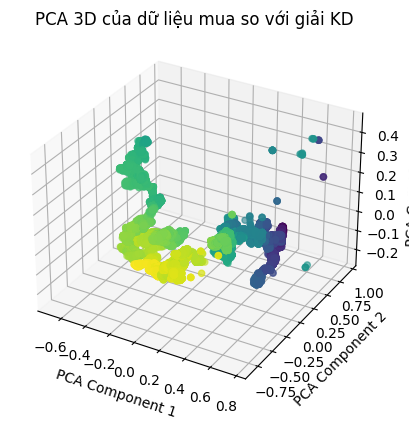

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Khởi tạo đối tượng Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot cho dữ liệu
ax.scatter(pca_scale_df[:, 0], pca_scale_df[:, 1], pca_scale_df[:, 2], c=dfKL)

# Thiết lập tiêu đề và trục
ax.set_title("PCA 3D của dữ liệu mua so với giá KL")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Hiển thị biểu đồ
plt.show()

#NHẬN XÉT VỀ ĐỒ THỊ TRÊN
Giá KL được biểu diễn bằng màu sắc của điểm dữ liệu.Các điểm dữ liệu được phân tán đều trên toàn bộ không gian 3 chiều, không có sự tập trung ở một khu vực cụ thể nào. Có thể thấy rằng, khi giá KL tăng lên, các điểm dữ liệu trở nên xanh lá cây và trở nên tối màu hơn, trong khi khi giá KL giảm, các điểm dữ liệu trở nên vàng và sáng hơn.

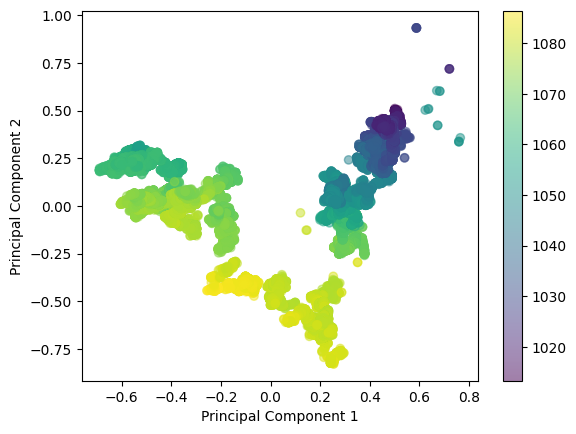

In [ ]:
# Vẽ scatter plot với giá KL biểu diễn bằng màu sắc
plt.scatter(pca_scale_df[:,0], pca_scale_df[:,1], c=dfKL, alpha=0.5)
plt.colorbar()
ax.set_title("PCA 3D của dữ liệu mua so với giá KL")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Giá phái sinh tập trung vào khoảng dữ liệu từ 1070 đến 1080

In [ ]:
pca_df = pd.DataFrame(
    data=pca_scale_df,
    columns=['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7','PC8','PC9', 'PC10'])
finalDf = pd.concat([pca_df,dfKL], axis = 1)
finalDf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gia KL
0,-0.612827,0.230089,0.193716,-0.007397,0.093042,0.018549,-0.018504,0.010888,-0.049481,-0.073787,NaN
1,-0.612827,0.230089,0.193716,-0.007397,0.093042,0.018549,-0.018504,0.010888,-0.049481,-0.073787,NaN
2,-0.634879,0.195922,0.171297,-0.021654,0.023275,-0.006863,0.008509,-0.002392,-0.006417,-0.021712,NaN
3,-0.646195,0.192629,0.168755,-0.028004,0.033514,-0.004688,0.012315,-0.002909,-0.002824,-0.026035,NaN
4,-0.641963,0.194300,0.169114,-0.025797,0.031020,-0.005848,0.012057,-0.003299,-0.002763,-0.025186,NaN
5,-0.634110,0.197607,0.170196,-0.020969,0.026758,-0.008703,0.010338,-0.003661,-0.002888,-0.022231,NaN
6,-0.635940,0.197419,0.172048,-0.022127,0.025845,-0.010878,0.011017,-0.003394,-0.002751,-0.021948,NaN
7,-0.638158,0.194859,0.170235,-0.021946,0.022210,-0.008188,0.008501,-0.003822,-0.005451,-0.023544,NaN
8,-0.637464,0.194380,0.167154,-0.021438,0.022179,-0.008491,0.005259,-0.004181,-0.005115,-0.024828,NaN
9,-0.624754,0.199356,0.169573,-0.015173,0.014189,-0.011970,0.003323,-0.004121,-0.004051,-0.023158,NaN


In [ ]:
# Phương sai giải thích thành phần chính
explained_variance = my_pca.explained_variance_ratio_
explained_variance

array([0.5687264 , 0.32058784, 0.03669668, 0.02039186, 0.0122725 ,
       0.00677345, 0.00517191, 0.00441783, 0.00342138, 0.00334576])

# Nhận xét về số liệu phương sai
 Tỉ lệ phần trăm phương sai được sắp xếp theo thứ tự giảm dần. Giá trị đầu tiên, 0.568, cho biết rằng 10 thành phần đầu tiên giải thích được 56.8% phương sai, trong khi giá trị cuối cùng, 0.003, chỉ giải thích được 0.3% phương sai. Tổng cộng, các thành phần chính đã giải thích được khoảng 97.1% phương sai, cho thấy rằng các thành phần còn lại không đóng góp quá nhiều vào việc giải thích sự biến động của dữ liệu.

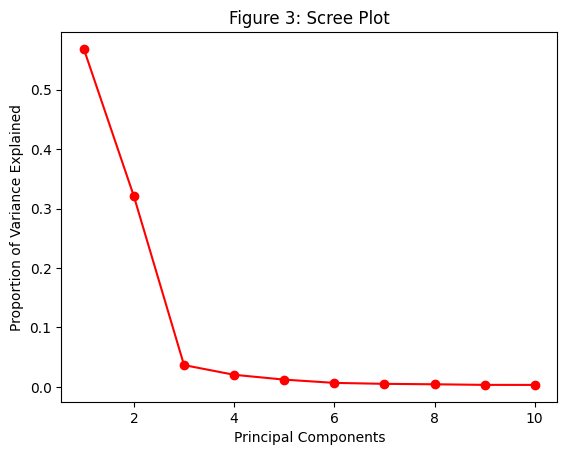

In [ ]:
# Trực quan phương sai giải thích thành phần chính sau khi PCA
PC_values = np.arange(my_pca.n_components_) + 1
plt.plot(PC_values,explained_variance, 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Qua biểu đồ trên, ta nhận thấy tỉ lệ phương sai tập trung hầu như ở 3 thành phần đầu. Do đó, theo "quy tắc khuỷ tay" ta có thể giữ lại 3 thành phần chính.

In [ ]:
def get_variance(X_train, n):
    scaler = MinMaxScaler()
    pca = PCA(n_components=n)
    pca.fit(scaler.fit_transform(X_train))
    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,10):
    print('Components:\t', i, '=\t', get_variance(X, i),
          '\tCumulative Variance')

Components:	 1 =	 [0.5687264] 	Cumulative Variance
Components:	 2 =	 [0.88931424] 	Cumulative Variance
Components:	 3 =	 [0.92601092] 	Cumulative Variance
Components:	 4 =	 [0.94640278] 	Cumulative Variance
Components:	 5 =	 [0.95867529] 	Cumulative Variance
Components:	 6 =	 [0.96544873] 	Cumulative Variance
Components:	 7 =	 [0.97062065] 	Cumulative Variance
Components:	 8 =	 [0.97503848] 	Cumulative Variance
Components:	 9 =	 [0.97845986] 	Cumulative Variance


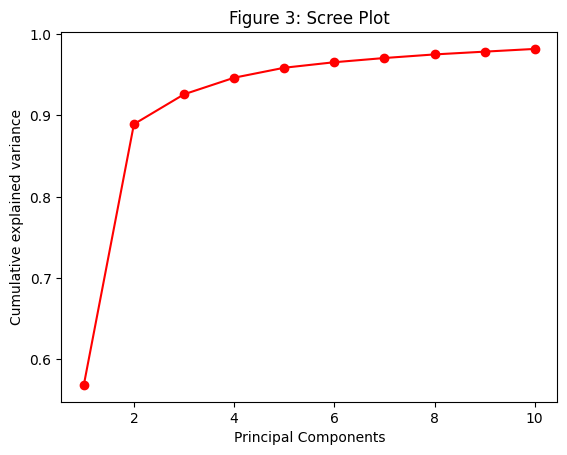

In [ ]:
# Tích luỹ phương sai giải thích thành phần chính
PC_values = np.arange(my_pca.n_components_) + 1
plt.plot(PC_values,explained_variance.cumsum(), 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

**Nhận xét về cách lấy clustering**
Qua biểu đồ trên, ta nhận thấy tỉ lệ phương sai tập trung hầu như ở 3 thành phần đầu. Do đó, theo "quy tắc khuỷ tay" ta có thể giữ lại 3 thành phần chính.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

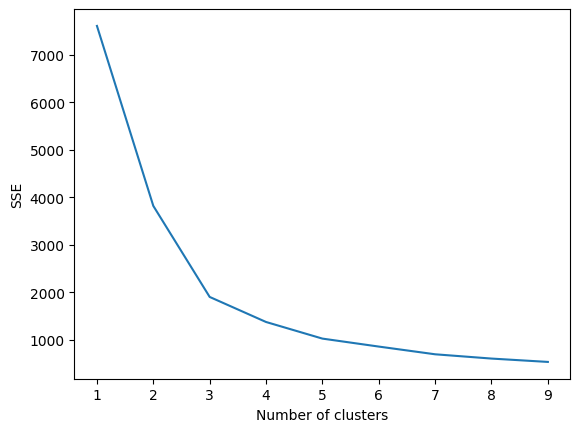

In [ ]:
#Tính SSE để xác định số lượng cụm tốt nhất cho dữ liệu đầu vào.
#Số lượng cụm tốt nhất sẽ tương ứng với điểm giao của đường SSE và trục x, khi giá trị SSE giảm dần và không còn giảm đáng kể khi số lượng cụm tăng thêm.
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_scale_df)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Tương tự như cách tìm số lượng thành phần chính, ta sử dụng quy tắc khuỷ tay để chọn ra số lượng clustering phù hợp nhất. Ở trường hợp này số lượng phù hơp nhất là 3

Sử dụng thuật toán KMeans để phân cụm dữ liệu trong biến pca_scale_df thành 3 cụm. Sau đó, định nghĩa một bản đồ màu (color map) để hiển thị mỗi cụm bằng một màu khác nhau trên biểu đồ phân tán. Cuối cùng, vẽ biểu đồ phân tán với các điểm dữ liệu đã được phân cụm và các trung tâm cụm được đánh dấu bằng ký hiệu "x" màu đen.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


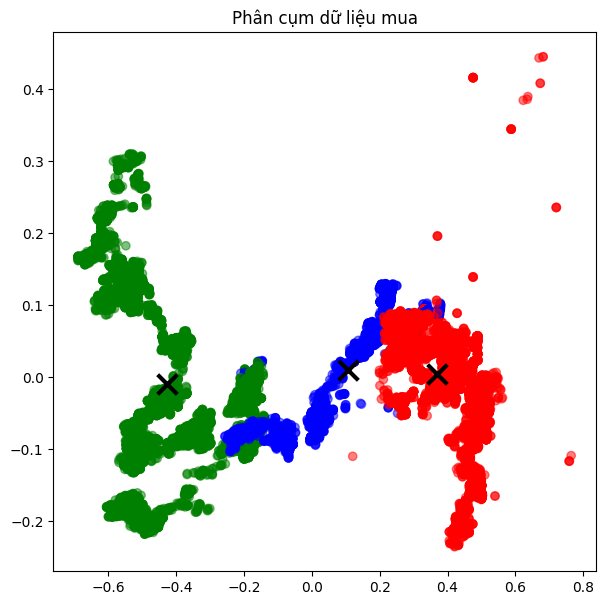

In [ ]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_scale_df)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_scale_df[:,0],pca_scale_df[:,2], c= label_color, alpha=0.5)
plt.scatter(centers[:,0], centers[:,2], marker='x', s=200, linewidths=3, color='k')
plt.title("Phân cụm dữ liệu mua")
plt.show()

Dữ liệu được phân cụm, nhưng vẫn chưa phân hóa rõ ràng do còn bị chồng lên nhau. Khoảng cách dữ liệu đến tâm của mỗi cầm còn chênh lệch, trong đó ta thấy rằng:
- Dữ liệu của thành phần thứ nhất (dữ liệu được đánh dấu màu đỏ) xấp xỉ khá tốt cho thâys

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(pca_scale_df, X_clustered)
print("Silhouette score for K-means clustering: ", silhouette_avg)


Silhouette score for K-means clustering:  0.5554260701813596


Giá trị silhouette score cho thấy độ tách biệt giữa các cụm là tốt khi nó gần 1 và không tốt khi nó tiến gần về 0. Trong trường hợp này, silhouette score là 0.56 - giá trị tương đối tốt - vì vậy có thể nói kết quả phân cụm của K-means là tương đối tốt, với độ tách biệt giữa các cụm đủ lớn.

In [ ]:
# Compute Ch-index score
ch_score = calinski_harabasz_score(pca_scale_df, X_clustered)
print("Ch-index score for K-means clustering: ", ch_score)

Ch-index score for K-means clustering:  45884.60646583691


*Ch-index score for K-means clustering của bạn là 45884.60.* Ch-index score giúp đánh giá sự tách biệt và đồng nhất giữa các cụm, giá trị càng cao thì sự tách biệt giữa các cụm càng tốt. Tuy nhiên, để đánh giá chính xác, bạn nên so sánh giá trị Ch-index score với các phương pháp phân cụm khác hoặc cùng phương pháp với các giá trị k khác nhau. Nếu giá trị Ch-index score cho các cụm là gần bằng nhau thì phân cụm có thể chưa phân chia rõ ràng. Nếu Ch-index score của một cụm rất cao và các cụm khác thấp thì có thể phân cụm đó đã chia rất rõ ràng.


TRIỂN KHAI PCA ĐỐI VỚI DỮ LIỆU BÁN THỊ TRƯỜNG SO VỚI GIÁ PHÁI SINH TẠI THỜI ĐIỂM ĐÓ

In [ ]:
Xb=dfBAN.iloc[:,0:30]
Yb=dfBAN.iloc[:,30] #target
# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
# Thực hiện transform scale
Xb_train = scaler.fit_transform(Xb)


In [ ]:
#Tính toán ma trận hiệp phương sai
cov_matrix=np.cov(Xb_train.T)
cov_matrix

array([[ 1.45922931e-03,  1.38014989e-04, -7.44677716e-05,
         1.37682831e-04,  5.27829047e-04,  6.66230701e-04,
        -2.47924517e-04,  1.52721360e-03,  6.67622719e-03,
         5.33186485e-04,  1.37530952e-03,  3.27925954e-05,
         9.13890120e-04,  1.67957263e-03,  2.07205188e-03,
         1.24200378e-03,  4.32690315e-04, -3.94076876e-03,
         1.41469485e-03,  9.33595519e-04,  1.86943110e-03,
         9.51405064e-04,  7.06135789e-04,  2.07960064e-03,
         7.22265274e-04,  5.59439757e-04, -2.58875804e-04,
         4.34552651e-06,  8.68646573e-04,  3.97082676e-04],
       [ 1.38014989e-04,  8.48463773e-04,  6.28011787e-04,
         3.96936775e-04, -5.48362144e-05, -1.16824792e-04,
         8.05390921e-04, -5.68196883e-04, -2.78455886e-03,
         2.69029415e-05, -7.99688690e-05, -8.38226736e-05,
        -8.02585848e-04, -1.43240767e-03, -1.20966997e-03,
        -2.51267802e-05, -3.39382936e-05,  5.32385054e-03,
        -2.43242386e-04, -2.86285508e-05, -9.89650282e-

In [ ]:
# Tính toán vector giá trị riêng
eigen_value,eigen_vector=np.linalg.eig(cov_matrix)
# Sắp xếp các giá trị rieng theo thu tu giam dan
sorted_id=np.argsort(eigen_value)[::-1]
sorted_eivl=eigen_value[sorted_id]
sorted_eivt=eigen_vector[:,sorted_id]
# Tính toán phương sai từ giá trị riêng
tot = sum(eigen_value)
var_exp = [(i/tot)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 78.38367504,  91.35835931,  93.61198564,  94.92194006,
        95.7597367 ,  96.43309215,  96.92633525,  97.40333128,
        97.82310666,  98.15050303,  98.44188963,  98.68805825,
        98.89177957,  99.05479332,  99.19251905,  99.30272554,
        99.40922199,  99.50213336,  99.58340934,  99.65870576,
        99.72188892,  99.77753875,  99.82717546,  99.8690466 ,
        99.90575819,  99.9330379 ,  99.95679345,  99.97575719,
        99.99091619, 100.        ])

In [ ]:
# Giảm chiều dữ liệu thành 10
my_pcab=PCA(n_components=10)
my_pcab.fit(Xb_train)
pca_scale_dfb=my_pcab.transform(Xb_train)
pca_scale_dfb.shape

print('Shape before PCA: ', Xb_train.shape)
print('Shape after PCA: ', pca_scale_dfb.shape)

Shape before PCA:  (30538, 30)
Shape after PCA:  (30538, 10)


In [ ]:
pca_dfm = pd.DataFrame(
    data=pca_scale_dfb,
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5','PC6', 'PC7', 'PC8','PC9', 'PC10'])
finalDf = pd.concat([pca_dfm,dfKL], axis = 1)
finalDf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gia KL
0,-0.358015,0.191390,0.090132,0.191774,-0.241910,-0.109668,0.075567,-0.018991,-0.079252,-0.020745,NaN
1,-0.358015,0.191390,0.090132,0.191774,-0.241910,-0.109668,0.075567,-0.018991,-0.079252,-0.020745,NaN
2,-0.439136,0.243299,-0.052226,-0.000503,0.043212,-0.006851,-0.001389,-0.022955,-0.001654,0.001391,NaN
3,-0.442936,0.248549,-0.051016,-0.001397,0.039885,-0.006179,0.000946,-0.024390,-0.002879,0.004452,NaN
4,-0.443068,0.249023,-0.050552,-0.001897,0.039390,-0.005433,0.000992,-0.023573,-0.002914,0.004971,NaN
5,-0.443565,0.249179,-0.050325,-0.002477,0.038633,-0.005588,0.002076,-0.026681,-0.004030,0.004037,NaN
6,-0.444407,0.249653,-0.051063,-0.004524,0.040441,-0.004750,0.001177,-0.025682,-0.003359,0.003859,NaN
7,-0.447121,0.250771,-0.051842,-0.002917,0.037536,-0.002460,0.001718,-0.023225,-0.001470,0.002631,NaN
8,-0.446583,0.250614,-0.051246,-0.001957,0.036032,-0.003241,0.002428,-0.021471,-0.001175,0.002830,NaN
9,-0.444019,0.248224,-0.051613,-0.000746,0.038756,-0.004800,0.001091,-0.021647,-0.002074,0.001746,NaN


In [ ]:
# Phương sai
explained_variancem = my_pcab.explained_variance_ratio_
explained_variancem

array([0.78383675, 0.12974684, 0.02253626, 0.01309954, 0.00837797,
       0.00673355, 0.00493243, 0.00476996, 0.00419775, 0.00327396])

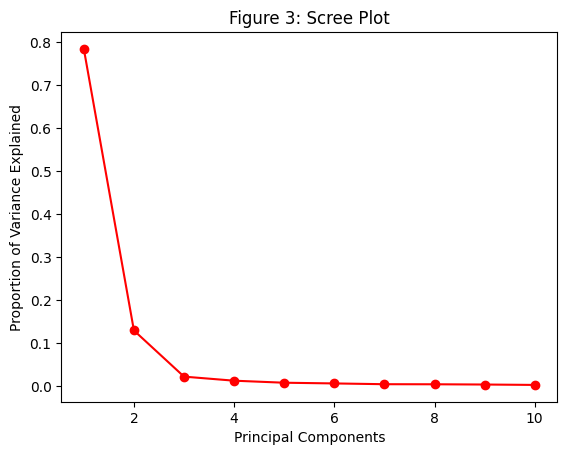

In [ ]:
# Trực quan phương sai sau khi PCA
PC_values = np.arange(my_pcab.n_components_) + 1
plt.plot(PC_values,explained_variancem, 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
def get_variance(Xm_train, n):
    scaler = MinMaxScaler()
    pca = PCA(n_components=n)
    pca.fit(scaler.fit_transform(Xb_train))
    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,10):
    print('Components:\t', i, '=\t', get_variance(X, i),
          '\tCumulative Variance')

Components:	 1 =	 [0.78383675] 	Cumulative Variance
Components:	 2 =	 [0.91358359] 	Cumulative Variance
Components:	 3 =	 [0.93611986] 	Cumulative Variance
Components:	 4 =	 [0.9492194] 	Cumulative Variance
Components:	 5 =	 [0.95759737] 	Cumulative Variance
Components:	 6 =	 [0.96433092] 	Cumulative Variance
Components:	 7 =	 [0.96926335] 	Cumulative Variance
Components:	 8 =	 [0.97403331] 	Cumulative Variance
Components:	 9 =	 [0.97823106] 	Cumulative Variance


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

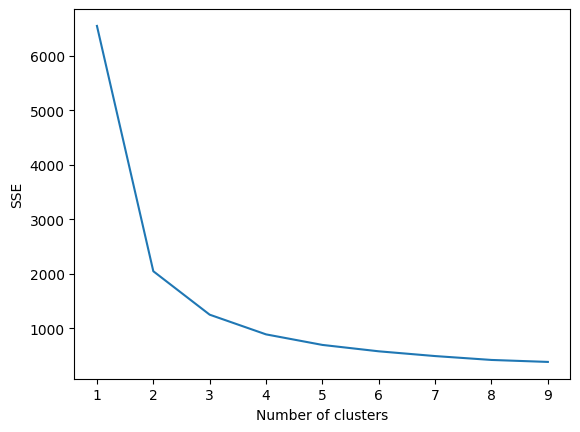

In [ ]:
#Tính SSE để xác định số lượng cụm tốt nhất cho dữ liệu đầu vào.
#Số lượng cụm tốt nhất sẽ tương ứng với điểm giao của đường SSE và trục x, khi giá trị SSE giảm dần và không còn giảm đáng kể khi số lượng cụm tăng thêm.
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_scale_dfb)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# Dựa vào biểu đồ ta nhận thấy số lượng cụm tốt nhất cho dữ liệu đầu vào là 3

Sử dụng thuật toán KMeans để phân cụm dữ liệu trong biến pca_scale_df thành 3 cụm. Sau đó, định nghĩa một bản đồ màu (color map) để hiển thị mỗi cụm bằng một màu khác nhau trên biểu đồ phân tán. Cuối cùng, vẽ biểu đồ phân tán với các điểm dữ liệu đã được phân cụm và các trung tâm cụm được đánh dấu bằng ký hiệu "x" màu đen.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


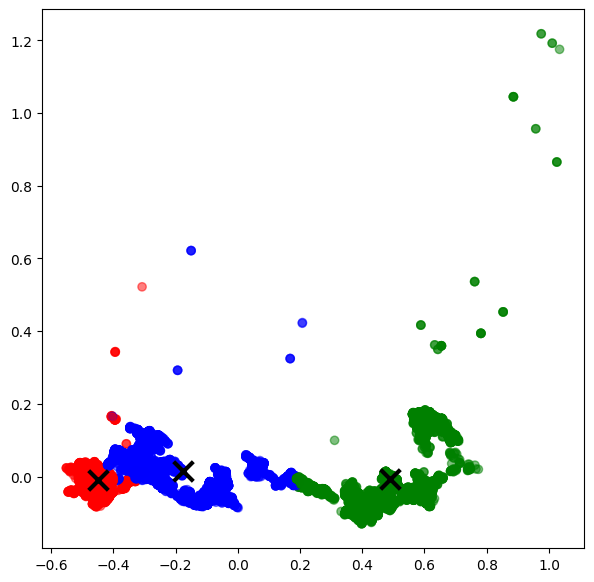

In [ ]:
# K- mean clustering with PCA
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_scale_dfb)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_scale_dfb[:,0],pca_scale_dfb[:,2], c= label_color, alpha=0.5)
plt.scatter(centers[:,0], centers[:,2], marker='x', s=200, linewidths=3, color='k')
plt.show()

Dữ liệu phân cụm tương đối rõ ràng, nhưng vẫn còn bị chồng lên nhau. Dữ liệu tập trung, phân bố xung quanh tâm cụm. Dữ liệu của thành phần thứ nhất (dữ liệu được đánh dấu màu đỏ) xấp xỉ khá tốt.

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(pca_scale_df, X_clustered)
print("Silhouette score for K-means clustering: ", silhouette_avg)

Silhouette score for K-means clustering:  0.43354418252779


In [ ]:
# Compute Ch-index score
ch_score = calinski_harabasz_score(pca_scale_df, X_clustered)
print("Ch-index score for K-means clustering: ", ch_score)

Ch-index score for K-means clustering:  31034.01718443157


TRIỂN KHAI PCA ĐỐI VỚI DỮ LIỆU KHỐI LƯỢNG MUA SO VỚI GIÁ PHÁI SINH TẠI THỜI ĐIỂM ĐÓ

In [ ]:
XMK=dfMUAkl.iloc[:,0:60]
YMK=dfMUAkl.iloc[:,60] #target
# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
# Thực hiện transform scale
XMK_train = scaler.fit_transform(XMK)
XMK_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.76424719e-02, 0.00000000e+00, 1.65562914e-03, ...,
        1.63666121e-03, 7.41420812e-02, 2.11587898e-02],
       [1.77399441e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.41420812e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.04746328e-02, 2.17520269e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.77304965e-01, 3.85754845e-05, 0.00000000e+00],
       [1.94944441e-04, 0.00000000e+00, 7.11920530e-02, ...,
        0.00000000e+00, 3.85754845e-05, 2.17520269e-03]])

In [ ]:
#Tính toán ma trận hiệp phương sai
cov_matrix_MK=np.cov(XMK_train.T)
cov_matrix_MK

array([[ 0.00580409,  0.00019408,  0.00029896, ...,  0.00161451,
         0.00012301,  0.00032126],
       [ 0.00019408,  0.00605469,  0.0003466 , ...,  0.00101182,
         0.0002854 ,  0.00017087],
       [ 0.00029896,  0.0003466 ,  0.00549918, ...,  0.00128955,
        -0.00027078,  0.00010805],
       ...,
       [ 0.00161451,  0.00101182,  0.00128955, ...,  0.04547908,
         0.00161652,  0.00027305],
       [ 0.00012301,  0.0002854 , -0.00027078, ...,  0.00161652,
         0.01904794,  0.00056524],
       [ 0.00032126,  0.00017087,  0.00010805, ...,  0.00027305,
         0.00056524,  0.00199532]])

In [ ]:
# Tính toán vector giá trị riêng
eigen_value,eigen_vector=np.linalg.eig(cov_matrix_MK)
# Sắp xếp các giá trị rieng theo thu tu giam dan
sorted_id=np.argsort(eigen_value)[::-1]
sorted_eivl=eigen_value[sorted_id]
sorted_eivt=eigen_vector[:,sorted_id]
# Tính toán phương sai từ giá trị riêng
tot = sum(eigen_value)
var_exp = [(i/tot)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 11.16199535,  18.41883323,  24.86646963,  29.27881072,
        33.46529339,  37.46682326,  41.43336036,  44.75747415,
        47.9067416 ,  50.89707387,  53.72988171,  56.25938634,
        58.51224704,  60.7002902 ,  62.77023893,  64.57443879,
        66.26230228,  67.89469037,  69.47850462,  70.98920858,
        72.47882399,  73.90444301,  75.27722652,  76.58279495,
        77.85129437,  79.0937137 ,  80.31812102,  81.50476217,
        82.63454199,  83.75121954,  84.75844129,  85.73240893,
        86.67255895,  87.58672601,  88.46469756,  89.32387106,
        90.1520272 ,  90.90863053,  91.64668086,  92.37980195,
        93.06634719,  93.72162105,  94.36890144,  94.98332742,
        95.58165591,  96.14990012,  96.6432289 ,  97.10815626,
        97.55138913,  97.97558928,  98.35975896,  98.72464514,
        98.98959635,  99.21222225,  99.43187993,  99.58652787,
        99.736014  ,  99.87253569,  99.96242474, 100.        ])

In [ ]:
# Giảm chiều dữ liệu thành 10
my_pca_MK=PCA(n_components=10)
my_pca_MK.fit(XMK_train)
pca_scale_df_MK=my_pca_MK.transform(XMK_train)
pca_scale_df_MK.shape

print('Shape before PCA: ', XMK_train.shape)
print('Shape after PCA: ', pca_scale_df_MK.shape)


Shape before PCA:  (30538, 60)
Shape after PCA:  (30538, 10)


In [ ]:
pca_df_MK = pd.DataFrame(
    data=pca_scale_df_MK,
    columns=['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7','PC8','PC9', 'PC10'])
finalDf = pd.concat([pca_df_MK,dfKL], axis = 1)
finalDf.head(10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gia KL
0,-0.500034,0.048810,-0.152712,0.116814,0.000796,0.022739,0.056795,0.043705,-0.040785,-0.046114,NaN
1,-0.341129,0.103689,-0.031006,0.016282,-0.012091,0.085491,0.094727,0.108561,0.008396,-0.035173,NaN
2,-0.440238,0.014671,-0.134927,0.026128,0.005778,0.068459,0.020475,0.007002,-0.011447,-0.044284,NaN
3,-0.347159,0.173563,-0.034754,0.036606,0.010414,0.102355,-0.024539,0.006948,-0.014628,-0.038697,NaN
4,-0.368985,0.192839,-0.034334,0.002819,0.191613,0.006547,0.002883,0.036051,-0.005826,-0.041391,NaN
5,-0.343426,0.145638,-0.003517,0.099928,-0.039291,0.051634,0.070036,0.061246,0.023846,-0.052174,NaN
6,-0.342939,0.063523,-0.047752,0.053008,0.006818,0.094728,0.127099,-0.044679,-0.010886,-0.055939,NaN
7,-0.350184,0.143722,-0.012712,-0.009911,0.173581,0.003059,-0.002778,0.050196,-0.011051,-0.060034,NaN
8,-0.372558,0.137890,-0.030076,0.041435,0.140399,-0.080605,0.000285,0.016696,-0.003710,-0.043403,NaN
9,-0.385077,0.072066,-0.080005,-0.004925,0.006567,0.094736,0.009987,0.065179,-0.008865,-0.038589,NaN


In [ ]:
# Phương sai giải thích
explained_variance_MK = my_pca_MK.explained_variance_ratio_
explained_variance_MK


array([0.11161995, 0.07256837, 0.06447627, 0.04412266, 0.04186461,
       0.04001089, 0.03965626, 0.03321807, 0.03147587, 0.0298828 ])

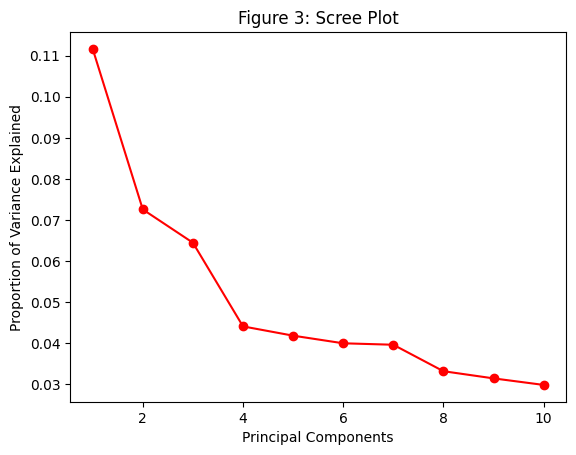

In [ ]:
# Trực quan phương sai giải thích sau khi PCA
PC_values = np.arange(my_pca_MK.n_components_) + 1
plt.plot(PC_values,explained_variance_MK, 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()


In [ ]:
def get_variance(XMK_train, n):
    scaler = MinMaxScaler()
    pca = PCA(n_components=n)
    pca.fit(scaler.fit_transform(XMK_train))
    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,10):
    print('Components:\t', i, '=\t', get_variance(X, i),
          '\tCumulative Variance')

Components:	 1 =	 [0.5687264] 	Cumulative Variance
Components:	 2 =	 [0.88931424] 	Cumulative Variance
Components:	 3 =	 [0.92601092] 	Cumulative Variance
Components:	 4 =	 [0.94640278] 	Cumulative Variance
Components:	 5 =	 [0.95867529] 	Cumulative Variance
Components:	 6 =	 [0.96544873] 	Cumulative Variance
Components:	 7 =	 [0.97062065] 	Cumulative Variance
Components:	 8 =	 [0.97503844] 	Cumulative Variance
Components:	 9 =	 [0.97845987] 	Cumulative Variance


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

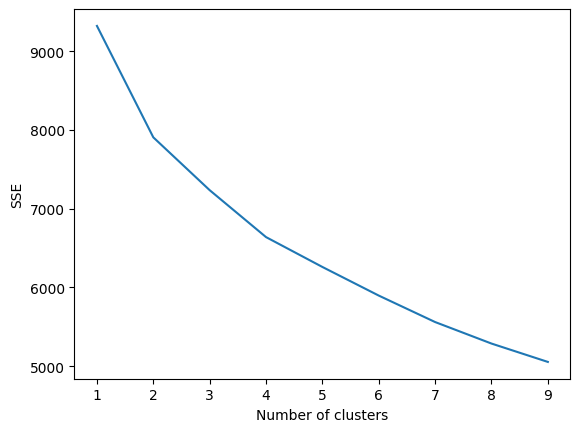

In [ ]:
#Tính SSE để xác định số lượng cụm tốt nhất cho dữ liệu đầu vào.
#Số lượng cụm tốt nhất sẽ tương ứng với điểm giao của đường SSE và trục x, khi giá trị SSE giảm dần và không còn giảm đáng kể khi số lượng cụm tăng thêm.
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_scale_df_MK)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# Dựa vào biểu đồ ta nhận thấy số lượng cụm tốt nhất cho dữ liệu đầu vào là 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


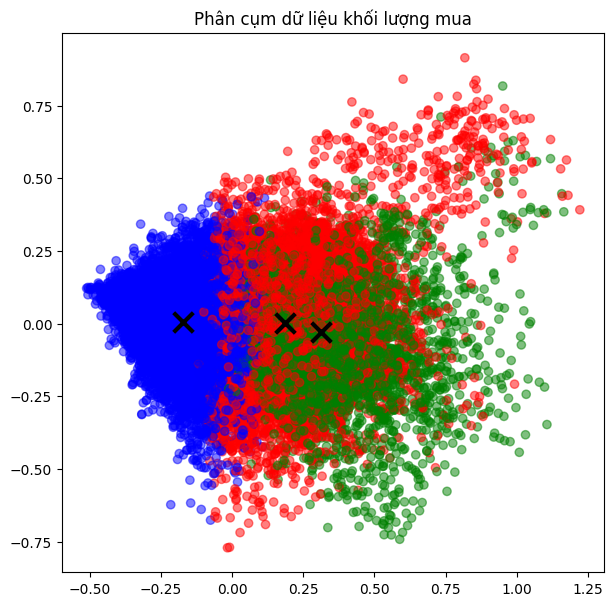

In [ ]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_scale_df_MK)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_scale_df_MK[:,0],pca_scale_df_MK[:,3], c= label_color, alpha=0.5)
plt.scatter(centers[:,0], centers[:,3], marker='x', s=200, linewidths=3, color='k')
plt.title("Phân cụm dữ liệu khối lượng mua")
plt.show()


Dữ liệu được phân cụm, nhưng vẫn chưa phân hóa rõ ràng do còn bị chồng lên nhau. Dữ liệu phân bố tập trung xung quanh tâm cụm điều này có thể cho thấy các giá trị chứng khoán trong mỗi cụm có xu hướng dao động trong một phạm vi giá tương đối hẹp và không quá khác biệt với nhau, dù có sự biến động về mức độ tăng giảm giá.

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(pca_scale_df_MK, X_clustered)
print("Silhouette score for K-means clustering: ", silhouette_avg)


Silhouette score for K-means clustering:  0.20110326470801118


In [ ]:
# Compute Ch-index score
ch_score = calinski_harabasz_score(pca_scale_df_MK, X_clustered)
print("Ch-index score for K-means clustering: ", ch_score)

Ch-index score for K-means clustering:  4112.396577271701


TRIỂN KHAI PCA ĐỐI VỚI DỮ LIỆU KHỐI LƯỢNG BÁN SO VỚI GIÁ PHÁI SINH TẠI THỜI ĐIỂM ĐÓ

In [ ]:
XBK=dfBANkl.iloc[:,0:60]
YBK=dfBANkl.iloc[:,60] #target
# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
# Thực hiện transform scale
scaler = MinMaxScaler()
XBK_train = scaler.fit_transform(XBK)


In [ ]:
#Tính toán ma trận hiệp phương sai
cov_matrix_BK=np.cov(XBK_train.T)
cov_matrix_BK

array([[ 2.31028321e-02,  1.55695937e-05,  2.61910735e-04, ...,
         2.78794166e-03, -3.71119100e-05,  4.11735184e-04],
       [ 1.55695937e-05,  6.90058751e-04,  2.41263156e-05, ...,
         6.57767048e-05,  1.69018284e-05,  2.02687705e-05],
       [ 2.61910735e-04,  2.41263156e-05,  2.98820213e-03, ...,
         8.29536958e-04,  3.62580253e-06,  2.12019311e-05],
       ...,
       [ 2.78794166e-03,  6.57767048e-05,  8.29536958e-04, ...,
         3.60372503e-02, -2.44169379e-04,  5.93000375e-04],
       [-3.71119100e-05,  1.69018284e-05,  3.62580253e-06, ...,
        -2.44169379e-04,  5.67053337e-03,  2.22611584e-04],
       [ 4.11735184e-04,  2.02687705e-05,  2.12019311e-05, ...,
         5.93000375e-04,  2.22611584e-04,  2.56553325e-03]])

In [ ]:
# Tính toán vector giá trị riêng
eigen_value,eigen_vector=np.linalg.eig(cov_matrix_BK)
# Sắp xếp các giá trị rieng theo thu tu giam dan
sorted_id=np.argsort(eigen_value)[::-1]
sorted_eivl=eigen_value[sorted_id]
sorted_eivt=eigen_vector[:,sorted_id]
# Tính toán phương sai từ giá trị riêng
tot = sum(eigen_value)
var_exp = [(i/tot)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp


array([ 13.92738294,  23.92763883,  32.89840233,  37.40007782,
        41.43693148,  45.06958168,  48.47791102,  51.48312694,
        54.1893487 ,  56.81947004,  59.2605705 ,  61.52313846,
        63.72925238,  65.88221939,  67.97511905,  69.78533565,
        71.56620541,  73.26090159,  74.87454542,  76.30552644,
        77.70681445,  78.97212092,  80.20055054,  81.36731781,
        82.45939283,  83.46214954,  84.36975374,  85.23356674,
        86.08101336,  86.91964977,  87.72768546,  88.50122554,
        89.2549664 ,  89.96424541,  90.64567469,  91.27790172,
        91.89044729,  92.48893985,  93.04891434,  93.58979317,
        94.11879001,  94.61558145,  95.10960622,  95.5812641 ,
        96.00739813,  96.42031917,  96.82402247,  97.21971439,
        97.60964562,  97.97709658,  98.30551545,  98.62665196,
        98.93380404,  99.21132918,  99.46294614,  99.70096579,
        99.81141946,  99.90666443,  99.97279815, 100.        ])

In [ ]:
# Giảm chiều dữ liệu thành 10
my_pca_BK=PCA(n_components=10)
my_pca_BK.fit(XBK_train)
pca_scale_df_BK=my_pca_BK.transform(XBK_train)
pca_scale_df_BK.shape

print('Shape before PCA: ', XBK_train.shape)
print('Shape after PCA: ', pca_scale_df_BK.shape)

Shape before PCA:  (30538, 60)
Shape after PCA:  (30538, 10)


In [ ]:
pca_df_BK = pd.DataFrame(
    data=pca_scale_df_BK,
    columns=['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7','PC8','PC9', 'PC10'])
finalDf = pd.concat([pca_df_BK,dfKL], axis = 1)
finalDf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gia KL
0,-0.494993,0.036832,-0.005592,-0.023140,-0.109820,0.009954,0.000133,0.017700,-0.010359,0.031781,NaN
1,-0.360461,0.005452,-0.033900,-0.004498,-0.019932,0.089486,-0.044112,0.022635,-0.045444,0.072447,NaN
2,-0.368241,0.023906,-0.034241,-0.048730,-0.048222,0.017853,-0.022409,0.040660,-0.057547,0.021878,NaN
3,-0.334091,0.028106,-0.024771,-0.006990,-0.028603,0.079317,-0.032431,0.021341,-0.073544,0.060854,NaN
4,-0.429976,0.021691,0.019849,0.044766,-0.048431,0.069742,-0.021370,0.029830,-0.049684,0.054510,NaN
5,-0.377104,-0.013865,0.014424,-0.044001,-0.048614,0.020385,-0.029258,0.039545,-0.050280,0.027616,NaN
6,-0.329473,0.026609,-0.011614,-0.008681,-0.035100,0.069785,-0.032438,0.008122,-0.060513,0.044214,NaN
7,-0.373879,-0.025965,-0.028751,-0.033234,-0.029000,0.042034,-0.003299,0.072216,-0.072442,0.020449,NaN
8,-0.324596,0.040687,-0.002514,-0.018247,-0.020624,0.049287,-0.028617,0.028387,-0.060105,0.029823,NaN
9,-0.363687,0.055411,-0.047643,-0.030388,-0.041618,0.101382,-0.024279,-0.013890,-0.013773,0.023406,NaN


In [ ]:
# Phương sai giải thích
explained_variance_BK= my_pca_BK.explained_variance_ratio_
explained_variance_BK

array([0.13927383, 0.10000256, 0.08970762, 0.04501659, 0.04036354,
       0.03632207, 0.03407814, 0.03001284, 0.02692628, 0.02624583])

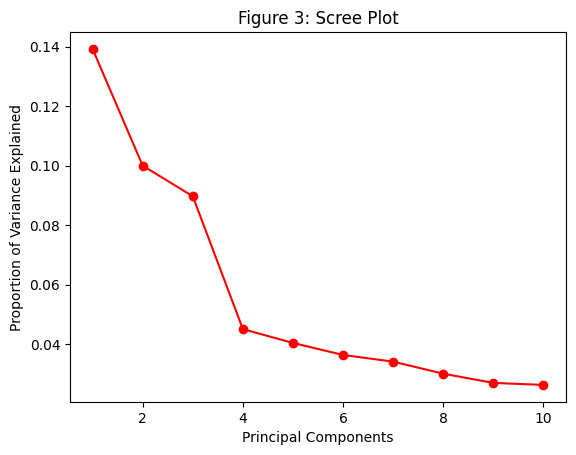

In [ ]:
# Trực quan phương sai giải thích sau khi PCA
PC_values = np.arange(my_pca_BK.n_components_) + 1
plt.plot(PC_values,explained_variance_BK, 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
def get_variance(XBK_train, n):
    scaler = MinMaxScaler()
    pca = PCA(n_components=n)
    pca.fit(scaler.fit_transform(XBK_train))
    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,10):
    print('Components:\t', i, '=\t', get_variance(X, i),
          '\tCumulative Variance')


Components:	 1 =	 [0.5687264] 	Cumulative Variance
Components:	 2 =	 [0.88931424] 	Cumulative Variance
Components:	 3 =	 [0.92601092] 	Cumulative Variance
Components:	 4 =	 [0.94640278] 	Cumulative Variance
Components:	 5 =	 [0.95867529] 	Cumulative Variance
Components:	 6 =	 [0.96544873] 	Cumulative Variance
Components:	 7 =	 [0.97062065] 	Cumulative Variance
Components:	 8 =	 [0.97503848] 	Cumulative Variance
Components:	 9 =	 [0.97845987] 	Cumulative Variance


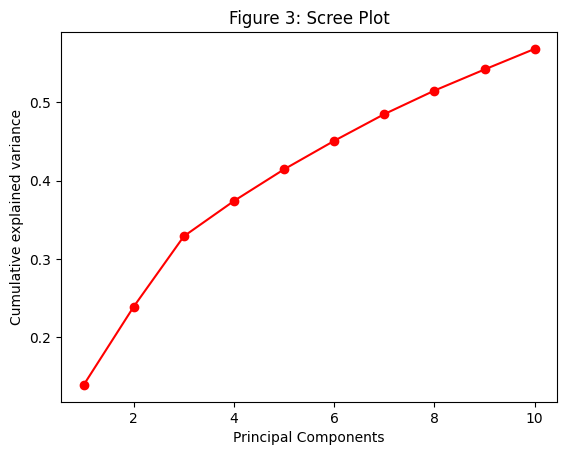

In [ ]:

PC_values = np.arange(my_pca_BK.n_components_) + 1
plt.plot(PC_values,explained_variance_BK.cumsum(), 'ro-')
plt.title('Figure 3: Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

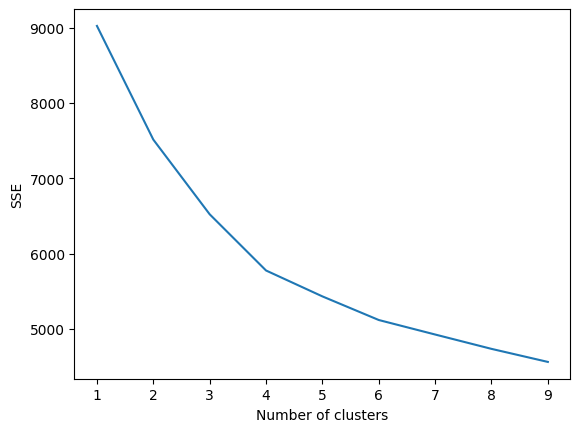

In [ ]:
#Tính SSE để xác định số lượng cụm tốt nhất cho dữ liệu đầu vào.
#Số lượng cụm tốt nhất sẽ tương ứng với điểm giao của đường SSE và trục x, khi giá trị SSE giảm dần và không còn giảm đáng kể khi số lượng cụm tăng thêm.
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_scale_df_BK)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# Dựa vào biểu đồ ta nhận thấy số lượng cụm tốt nhất cho dữ liệu đầu vào là 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


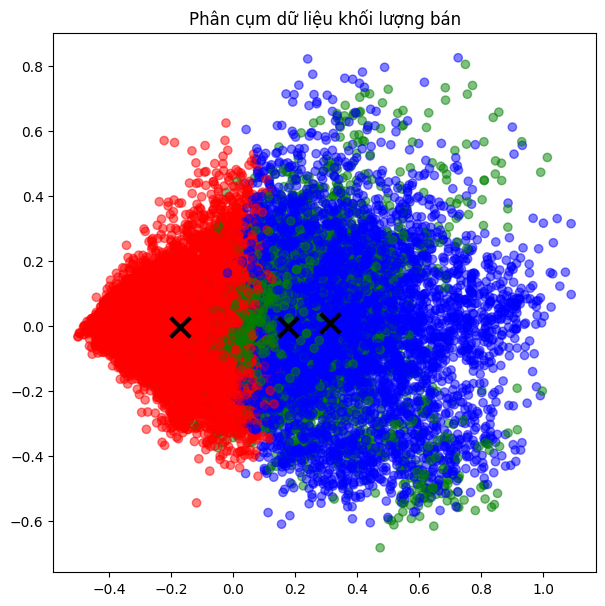

In [ ]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_scale_df_BK)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_scale_df_BK[:,0],pca_scale_df_BK[:,3], c= label_color, alpha=0.5)
plt.scatter(centers[:,0], centers[:,3], marker='x', s=200, linewidths=3, color='k')
plt.title("Phân cụm dữ liệu khối lượng bán")
plt.show()

Dữ liệu được phân cụm, nhưng vẫn chưa phân hóa rõ ràng do còn bị chồng lên nhau. Dữ liệu phân bố tập trung xung quanh tâm cụm thấy rằng các điểm dữ liệu trong cùng một cụm có tính tương đồng lớn. Dữ liệu của thành phần thứ nhất (dữ liệu được đánh dấu màu đỏ) xấp xỉ khá tốt.Do đó cho thấy kết quả phân cụm là hiệu quả

**BẢNG PHÂN CÔNG**

|**MSSV**| **Người thực hiện** |
|:-------|:-------------------:|
|21280082|**Nguyễn Thị Yến Như**|
|21280059|**Trần Thị Bích Tuyền**|
|21280118|**Lê Nguyễn Hoàng Uyên**|
|21280125|**Trần Thị Uyên Nhi**|